# Kaggle Airbnb New User Predictor

Apik Zorian

February 13, 2018

# Project Overview


Airbnb is an online peer-to-peer property rental service that allows users to book short-term lodging. This includes rooms, apartments, entire homes, vacation rentals, etc. Airbnb brokers reservations between users and landlords for lodging all over the world. As of January 2018, the company had over 3 million listings in 65,000 cities over 191 countries ( [reference](https://www.airbnb.com/about/about-us) ). 


One way to immediately pique a new user's interest is to advertise bookings in a city or country the user would first like to visit. By accurately predicting where a new user will book his or her first trip, Airbnb can curate personalized content to showcase that will result in the user completing their booking. For Airbnb, this helps decrease the average time for first booking for a new user and helps personalize content for their community. It also improves the new user's first booking experience by curating content to their travel preferences. 

Airbnb has done a fair amount of research on this topic, including initiating a [Kaggle Recruitment Challenge](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings#description) to address this very issue. Many of the contestants shared their views on their approach to solving the first booking problem and their findings during implementation (see [Pons](http://blog.kaggle.com/2016/03/07/airbnb-new-user-bookings-winners-interview-3rd-place-sandro-vega-pons/] ) and [Kuroyanagi](http://blog.kaggle.com/2016/03/17/airbnb-new-user-bookings-winners-interview-2nd-place-keiichi-kuroyanagi-keiku/) ). 



## Problem Statement

The challenge then becomes: How can Airbnb predict the country in which a new user will make his or her first booking?

In this project, we will predict a new user's first booking by deploying machine learning algorithms to analyze data about the user that will help predict this first booking. Airbnb has posted this very problem as a [Kaggle Recruitment Challenge](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings#description) and has provided New User Booking Data to help participants develop models to predict a new user's first booking. This data includes information about users demographics, web session records, and summary statistics. 

Our goal is to analyze the data, build and train a model, and test this model to predict a new user's first booking.

## Solution Statement

We believe that features in training dataset can be leveraged to come up with a model that can accurately predict where a new user's first destination will be. We understand that information about past users, including their actions, characteristics, demographics, and personal information, can be used to develop a machine learning model to predict where a new user with similar traits would decide to travel. 

We will begin with the 15 features included in the `training_set` as the inputs for the model, and the `country_destination` feature as the label. Along the way, we may find some features less useful than others, while some features combined may help simplify our model. These will be explored more as we test our model's capabilities and determine the pros and cons of using different models.We will be sure to test out a variety of supervised-learning models, including SVM, Decision Trees, and Random Forest. We will use ensemble learning techniques such as Gradient Tree Boosting and XGBoost as our final solution and will prove finalize how boosting will yield a better result than standard supervised learning algorithms. We will also do parameter tuning using Gridsearch.


## Evaluation Metrics

Kaggle assesses submissions based on Normalized discounted cumulative gain (nDCG). Discounted cumulative gain is used to measure ranking quality, usually for measuring the effectiveness of web search engine algorithms. The *gain* measured can be thought of as the usefulness of an element based on its position in the list of results, where results are a list of elements in graded relevance scale generated from search-engine. This gain is accumulated from the top of the list to the bottom, with the gain of each result discounted at lower ranks (ref [Discounted cumulative gain](https://en.wikipedia.org/wiki/Discounted_cumulative_gain#Normalized_DCG)). Since the list of results can vary in length, the cumulative gain at each position should be **normalized** across queries to achieve consistencey. This can be calculated using the following equation:

![alt text](https://image.ibb.co/bBNhYb/NDCG1.jpg)

where reli is the relevance of the result at position i. We will be making a maximum of 5 predictions per booking (k = 5). 

For each new user, we make a maximum of 5 predictions on the country of the first booking. The ground truth country is marked with relevance = 1, while the rest have relevance = 0.

If, for example, the destination for a particular user is France (FR), then the predictions become:

![alt text](https://image.ibb.co/dc1btb/Capture.jpg)


Kaggle uses nDCG as the [evaluation metric](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings#evaluation) to assess participants for their competition, so this will be our metric as well. The reasoning behind this is that nDCG is designed for situations of graded notions of relevance, which is ideal for our project. Using **precision** or **recall** are generally good metrics to evaluate the level of relevance importance. However, neither of these meterics considers the *position* of an item in the retrieved result list. Rather than using a binary relevance function, we need to evaluate our list using a graded relevance function to measure the gain of an element based on its position in the result list. Since we will be evaluating our top 5 predictions per booking, we need to evaluate the *ranking quality* of our model, which the gain will help us measure. 

# Analysis

## Data Exploration

The dataset provided by Airbnb includes 5 .csv files that describe a user, their personal information, their web session records, and some summary statistics. 




1 & 2) [train_users.csv](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/download/train_users_2.csv.zip) & [test_users.csv](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/download/test_users.csv.zip)

    These datasets will be used to train and test our model, respectively. For each use in the dataset, we are provided the following features:
  
  * id: user id
  * date_account_created: the date of account creation
  * timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
  * date_first_booking: date of first booking
  * gender
  * age
  * signup_method
  * signup_flow: the page a user came to signup up from
  * language: international language preference
  * affiliate_channel: what kind of paid marketing
  * affiliate_provider: where the marketing is e.g. google, craigslist, other
  * first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
  * signup_app
  * first_device_type
  * first_browser
  * country_destination: this is the target variable you are to predict
  
  
3) [sessions.csv](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/download/sessions.csv.zip) - This file contains information on the user's web sessions.  Features included in this file contain:
  * user_id: to be joined with the column 'id' in users table
  * action
  * action_type
  * action_detail
  * device_type
  * secs_elapsed
  
    This information can be used to provide meaningful insight on the user that may help us predict his or her first booking. For example, we could see the different types of actions a user took, if he/she began planning a trip, how long he/she spent deciding on an action (secs elapsed), etc. This information could be used to help predict where the user would want to travel first, as well as things about the trip that are important to the user, which Airbnb could leverage in their first attempt at customizing the trip for the user.
  
  
4) [countries.csv](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/download/countries.csv.zip) - Summary statistics of destination countries in this dataset and their locations. This includes:
  * country name
  * latitude and longitutde
  * distance from U.S. (km2)
  * language and language levenshtein distance (how close words in the language are to words in english language)

    This information can be used to help determine if the country would interest the user based in its distance from the U.S. and whether or not the user would feel comfortable given the spoken language of that country. For example, the user may speak the main language spoken in that country, or the distance is not far enough from the U.S. to where the user would be discouraged from booking a trip.


5) [age_gender_bkts.csv](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/download/age_gender_bkts.csv.zip) - Summary statistics of users' age group, gender, country of destination. This dataset includes the following columns:
 * age_bucket
 * country_destination
 * gender
 * population_in_thousands
 * year
  
    This information can be used to help understand what types of other users have chosen select countries. For example, we can see what age range of men booked trips to France in 2015 and compare this to the user's age and gender. This information would help determine whether or not the user would want to book a trip to this destination.

## Exploratory Visualization

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime, date
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from IPython.display import display
import gc

# Draw inline
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

# Load the data into DataFrames
path = './data/'
train_users = pd.read_csv(path + 'train_users_2.csv')
test_users = pd.read_csv(path + 'test_users.csv')
sessions = pd.read_csv(path + 'sessions.csv')
countries = pd.read_csv(path + 'countries.csv')
age_gender = pd.read_csv(path + 'age_gender_bkts.csv')

labels = train_users['country_destination']

print("Number of users in the training set = " + str(train_users.shape[0]))
print("Number of users in the testing set = " + str(test_users.shape[0]))
print(str(sessions.shape[0]) + " session records for " + str(sessions.user_id.nunique()) + " users." )
print("Number of records in the countries dataset = " + str(countries.shape[0]))
print("Number of records in the age/gender dataset = " + str(age_gender.shape[0]))
print("Number of features in training set = " + str(train_users.shape[1]))

Number of users in the training set = 213451
Number of users in the testing set = 62096
10567737 session records for 135483 users.
Number of records in the countries dataset = 10
Number of records in the age/gender dataset = 420
Number of features in training set = 16


Our training data file consists of 213451 users with 15 features for each user. These features include users' gender, age, the date their account was created, sign up method, and other information. Our goal was first to clean up the data by removing data that may obstruct our analysis and combining features that may be able relevant to each other. We also wanted to see if there were any strange behavior or missing data.

Although our training and testing data was given to us separately, we decided to combine the two to make sure we would perform our data manipulation equally across our datasets. Later, when we will design our models, we will separate our training data from our testing data and only train on the training data. 

In [2]:
# Combine train and test dataset for cleaning
users_combo = pd.concat((train_users, test_users), axis=0, ignore_index=True)

# Remove id as a feature, use it as the index
users_combo.set_index('id', inplace=True)

users_combo.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
id,,,,,,,,,,,,,,,
gxn3p5htnn,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
820tgsjxq7,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
4ft3gnwmtx,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
bjjt8pjhuk,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
87mebub9p4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


In [3]:
print "Number of rows: " + str(users_combo.shape[0])
print "Number of columns: " + str(users_combo.shape[1])

Number of rows: 275547
Number of columns: 15


### Missing Data

In [4]:
display((users_combo.isnull().sum() / users_combo.shape[0]) * 100)
display((test_users.isnull().sum() / test_users.shape[0]) * 100)
display((train_users.isnull().sum() / train_users.shape[0]) * 100)

affiliate_channel           0.000000
affiliate_provider          0.000000
age                        42.412365
country_destination        22.535538
date_account_created        0.000000
date_first_booking         67.733998
first_affiliate_tracked     2.208335
first_browser               0.000000
first_device_type           0.000000
gender                      0.000000
language                    0.000000
signup_app                  0.000000
signup_flow                 0.000000
signup_method               0.000000
timestamp_first_active      0.000000
dtype: float64

id                           0.000000
date_account_created         0.000000
timestamp_first_active       0.000000
date_first_booking         100.000000
gender                       0.000000
age                         46.502190
signup_method                0.000000
signup_flow                  0.000000
language                     0.000000
affiliate_channel            0.000000
affiliate_provider           0.000000
first_affiliate_tracked      0.032208
signup_app                   0.000000
first_device_type            0.000000
first_browser                0.000000
dtype: float64

id                          0.000000
date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         58.347349
gender                      0.000000
age                        41.222576
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.841402
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
dtype: float64

We were surprised to see that 100% and 67.7% of the `date_first_booking` feature were missing from the testing and training sets, respectively, as well as almost half of the age feature from each set

In [6]:
display(users_combo.head())

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
id,,,,,,,,,,,,,,
gxn3p5htnn,direct,direct,NaN,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
820tgsjxq7,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
4ft3gnwmtx,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
bjjt8pjhuk,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
87mebub9p4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


There are also a lot of NaN (not a number) values in the data set, which we will later take care of as well

### Data Visualization - Country Destination


In [3]:
## Set standard figure parameters
fig_std=(10,8)
width = 0.4

[Text(0,0.5,u'frequency'), Text(0.5,0,u'countries')]

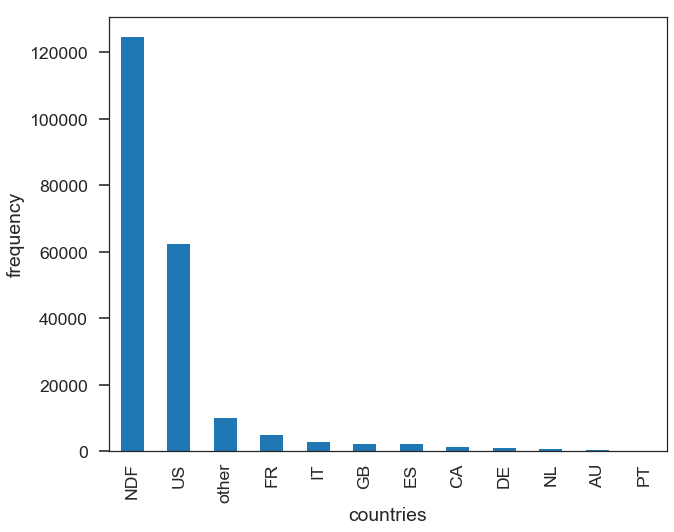

In [19]:
labels.value_counts().plot(kind='bar', figsize=fig_std).set(xlabel='countries', ylabel='frequency')

### Data Visualization - Timestamp

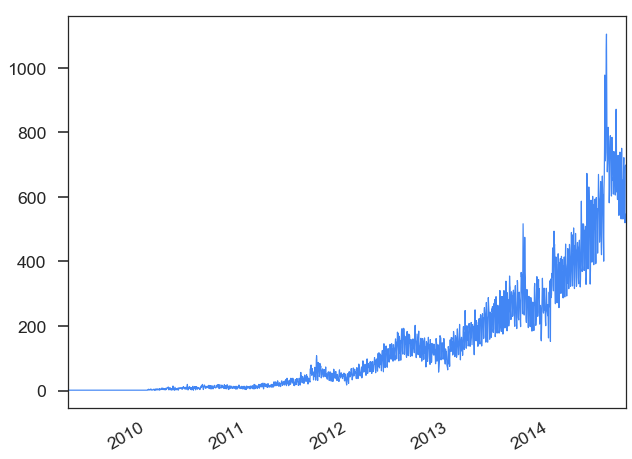

In [20]:
import datetime

t_first_active = pd.to_datetime(users_combo['timestamp_first_active'], format='%Y%m%d%H%M%S')
dfa = t_first_active.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
dfa.value_counts().plot(kind='line', linewidth=1.2, color='#4286f4', figsize=fig_std)

### Data Visualization - Age


From plotting the country destinations, we can see that almost 75% of the customers do not make a booking on their first login. Of those that do, the vast majority book a trip to a destination within the U.S.

In [21]:
users_combo.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

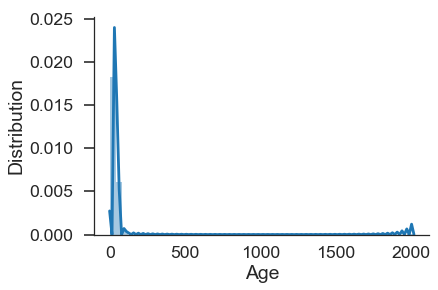

In [22]:
sns.distplot(users_combo.age.dropna())
plt.xlabel('Age')
plt.ylabel('Distribution')
sns.despine()

We noticed that while signing up, users had often neglected to input their correct birthday (some users were aged 2000+), some had negative age numbers, while some may have not put in an age at all. 

In [23]:
print(str(sum(users_combo.age > 100)) + ' users with age > 100')
print(str(sum(users_combo.age < 15)) + ' users with age < 15')

2690 users with age > 100
59 users with age < 15


### Data Visualization - Gender

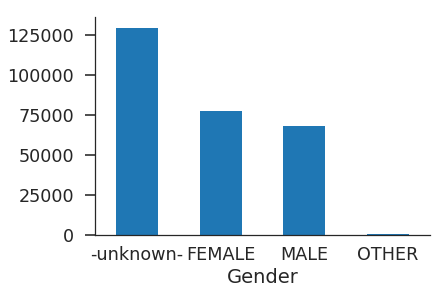

In [9]:
users_combo.gender.value_counts(dropna=False).plot(kind='bar', rot=0)
plt.xlabel('Gender')
sns.despine()

We can see above that there is a good amount of data missing in the gender feature as well. For the users who did identify a gender, the counts seemed to be fairly similar. Below, we plotted gender to destination to see if there would be any relevant information. Again, the tendencies were fairly similar

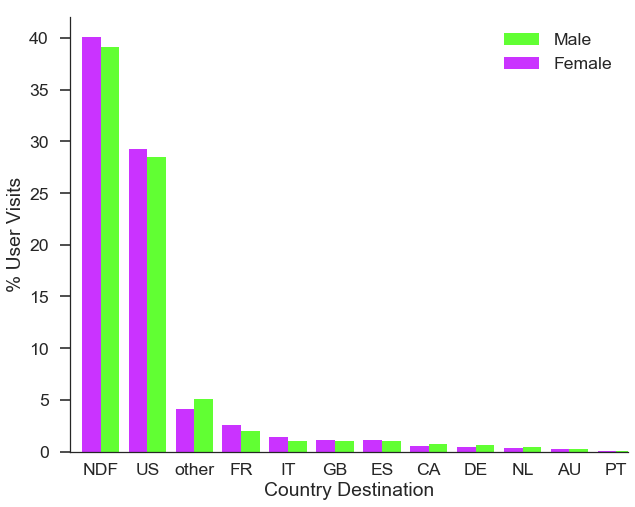

In [25]:
men = sum(users_combo['gender'] == 'MALE')
women = sum(users_combo['gender'] == 'FEMALE')

women_countries = users_combo.loc[users_combo['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
men_countries = users_combo.loc[users_combo['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

men_countries.plot(kind='bar', width=width, color='#61ff33', position=0, label='Male', rot=0, figsize=fig_std)
women_countries.plot(kind='bar', width=width, color='#ca33ff', position=1, label='Female', rot=0, figsize=fig_std)

plt.legend()
plt.xlabel('Country Destination')
plt.ylabel('% User Visits')

sns.despine()
plt.show()

### Data Analysis - Other Training Files

In [26]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [27]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [28]:
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


## Algorithms and Techniques

Ensemble learning is a powerful way to improve Machine Learning models. It involves combining invidiual learners, which are considered "weak" learners, to create a "strong learner". The weak learners can be a number of machine learning models, such as SVMs or Naive Bayes Classifiers. 

In this project, we will use two ensemble learners that use Decision Trees as their "weak learners" and will use a Decision Tree as our benchmark model

Below are the Ensemble Learners we will be building to make our predictions:

### Ensemble Learners
    1. Random Forest Classifier: In Random Forest models, a random percentage of the data is chosen T times, where T is the number of Decision Trees. After the data passes through the trees, the result is either averaged as a mean prediction (regression) or as a class (classification). The advantage of Random Forests is that they operate with the bias of a single decision tree but decrease the variance, so they make up for the overfitting you would get with a decision tree. 
    2. XGBoost: XGBoost is an ensemble learning method that utilizes gradient boosting with decision trees. Boosting is an ensemble technique where new models are added to correct errors made by existing models. In this case, the models are decision trees. Trees are added sequentiall until no further imrpovements can be made. XGBoost has high execution speed, strong model performance, and is the go-to algorithm for winners of Kaggle competitions
    
### Additional Supervised Learners
Although we will be using Decision Trees as our benchmark, we will also try to make predictions using a couple of other Machine Learning Algorithms to give us perspective. Here are a couple of basic supervised learners we will also be training:

    1. Logistic Regression: Logistic Regression can be used to fit complex, non-linear datasets. It uses gradient descent to find the coeficients of the polynomial to best split the data.
    
    2. Support Vector Machine: SVM can be considered as one of the basic Machine Learning algorithms for supervised learning and is good to use when there is a clear margin of separation for the data. However, it is not recommended when dealing with a large data set because training time takes a while (training time is cubic in the size of the data set).

## Benchmark

### Decision Tree Classifier

Decision Trees are powerful Machine Learning tools for multiclass classification problems, including the one we are working on. They are able to learn simple decision rules when being trained on training data. They are, however, prone to overfitting when dealing with data that has lots of features. They are better suited as building blocks for ensemble methods, which we will see later. Since our goal is to build ensemble learner classifiers that are built using decision trees, it is only right that we use a decision tree as our baseline score.

# Methodology

## Preprocessing

### Age

We start by setting the values for the users' ages that are either greater than 100 or less than 15 to `NAN`

In [30]:
users_combo['age'].loc[users_combo['age'] < 15] = np.nan
users_combo['age'].loc[users_combo['age'] > 100] = np.nan

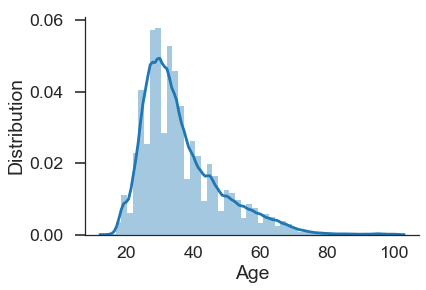

In [31]:
sns.distplot(users_combo.age.dropna())
plt.xlabel('Age')
plt.ylabel('Distribution')
sns.despine()

### Missing Values

We replaced all `NAN` values with -1, to make sure they are in line with the rest of the numerical values in the respective column

In [32]:
display(users_combo.head())
users_combo = users_combo.fillna(-1)
users_combo = users_combo.replace('-unknown-', -1)

display(users_combo.head())

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
id,,,,,,,,,,,,,,
gxn3p5htnn,direct,direct,NaN,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
820tgsjxq7,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
4ft3gnwmtx,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
bjjt8pjhuk,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
87mebub9p4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
id,,,,,,,,,,,,,,
gxn3p5htnn,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-1,en,Web,0,facebook,20090319043255
820tgsjxq7,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
4ft3gnwmtx,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
bjjt8pjhuk,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
87mebub9p4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-1,en,Web,0,basic,20091208061105


We decided we would remove the `date_frst_booking` feature since we had earlier noticed that it was mostly missing from our training data

In [34]:
users_combo = users_combo.drop(['date_first_booking'], axis=1)

### Feature Creation and One-Hot Encoding 

Ref: [Pons](http://blog.kaggle.com/2016/03/07/airbnb-new-user-bookings-winners-interview-3rd-place-sandro-vega-pons/] )

We wanted to generate new features to better help us make predictions with our model. One way was to generalize features we already had. By combining features that are relevant to each other, we can reduce the number of features we need to train our model on, which helps reduce complexity and potentially reduce the runtime for training.

#### Feature Creation - Age

We created age intervals, where each 5-year interval from 0 to 100 was a separate grouping. We grouped the users into different age intervals based on the 5-year intervals, one hot encoded the results, and added it back into our dataset. Since we had 5-year intervals from 0 to 100, we have added 20 new columns to our dataset, and after removing the `data_first_booking` feature, we were now at 

In [35]:
age_intervals = list(range(0,100,5))
age_intervals_length = len(age_intervals)

def get_interv_value(age):
    iv = 20
    for i in range(age_intervals_length):
        if age < age_intervals[i]:
            iv = i 
            break
    return iv

users_combo['age_intervals'] = users_combo.age.apply(lambda x: get_interv_value(x))
## One hot encode age intervals
users_onehot_age = pd.get_dummies(users_combo.age_intervals, prefix='age_intervals')

## Remove age_intervals from users_combo and add one hot encoded age intervals
users_combo = users_combo.drop(['age_intervals'], axis=1)
users_combo = pd.concat((users_combo, users_onehot_age),axis = 1)

In [36]:
display(users_combo.head())

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,...,age_intervals_11,age_intervals_12,age_intervals_13,age_intervals_14,age_intervals_15,age_intervals_16,age_intervals_17,age_intervals_18,age_intervals_19,age_intervals_20
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-1,en,...,0,0,0,0,0,0,0,0,0,0
820tgsjxq7,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,en,...,0,0,0,0,0,0,0,0,0,0
4ft3gnwmtx,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,en,...,0,1,0,0,0,0,0,0,0,0
bjjt8pjhuk,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,en,...,0,0,0,0,0,0,0,0,0,0
87mebub9p4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-1,en,...,0,0,0,0,0,0,0,0,0,0


#### Feature Creation - Date account created

One feature that had potential of being helpful but needed to be modified was the `date_account_created` feature.

In [37]:
account_arr = np.vstack(users_combo.date_account_created.astype(str))

account_date = np.vstack(users_combo.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)


In [40]:
users_combo['date_account_created'] = account_date[:,0]
users_combo['date_account_created'] = account_date[:,1]
users_combo['date_account_created'] = account_date[:,2]
account_create_dates = [datetime(x[0],x[1],x[2]) for x in account_date]

The year, month, and date of each user's sign up for their account were lumped together in this feature, with hyphens separating them, as follows:

In [10]:
print(account_create_dates[0])

2010-06-28 00:00:00


We decided that we could benefit from understanding the day of the week that the user created their account, so we created a one-hot-encoded weekday feature, with 7 new columns added to our dataset, one for each day of the week. We also added a "week number" feature, which stores the week number in the year when the user created the account. Rather than one-hot encoding this feature (52 weeks in a year, which would have required 52 columns), we instead stored the numerical value of the week of the year for each user. Thus,we added 8 new columns to the data: one for each day of the week (`dac_w_#`) and one for the week number (`dac_wn`)


In [11]:

users_combo['dac_wn'] = np.array([d.isocalendar()[1] for d in account_create_dates])
users_combo['dac_w'] = np.array([d.weekday() for d in account_create_dates])
users_wd = pd.get_dummies(users_combo.dac_w, prefix='dac_w')
users_combo = users_combo.drop(['date_account_created', 'dac_w'], axis=1)
users_combo = pd.concat((users_combo, users_wd), axis=1)

In [12]:
display(users_combo.head())

,affiliate_channel,affiliate_provider,age,country_destination,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,...,age_intervals_20,account_year,dac_wn,dac_w_0,dac_w_1,dac_w_2,dac_w_3,dac_w_4,dac_w_5,dac_w_6
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,direct,direct,NaN,NDF,untracked,Chrome,Mac Desktop,-unknown-,en,Web,...,1,28,26,1,0,0,0,0,0,0
820tgsjxq7,seo,google,38.0,NDF,untracked,Chrome,Mac Desktop,MALE,en,Web,...,0,25,21,0,0,1,0,0,0,0
4ft3gnwmtx,direct,direct,56.0,US,untracked,IE,Windows Desktop,FEMALE,en,Web,...,0,28,39,0,1,0,0,0,0,0
bjjt8pjhuk,direct,direct,42.0,other,untracked,Firefox,Mac Desktop,FEMALE,en,Web,...,0,5,49,1,0,0,0,0,0,0
87mebub9p4,direct,direct,41.0,US,untracked,Chrome,Mac Desktop,-unknown-,en,Web,...,0,14,37,0,1,0,0,0,0,0


#### Feature Creation - Timestamp

Similarly to our method in the `data_account_created` feature, we also simplified the `timestamp_first_active` feature in our data set. This was a bit more complex, since the feature was input as the numerical combination of the year-month-day-hour-minute-second that the user was first active. 

In [13]:
tstamp = np.vstack(users_combo.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)

users_combo['tstamp_year'] = tstamp[:,0]
users_combo['tstamp_month'] = tstamp[:,1]
users_combo['tstamp_day'] = tstamp[:,2]
users_combo['tstamp_hour'] = tstamp[:,3]

After splitting the single value based on the index of the numbers within the value, we took just the date, created a weekday feature (`tstamp_weekday_#`) which we one hot encoded and added the features for each user. We also created a weekday number feature for the timestamp (`tstamp_week`), similar to what we did for the `date_account_created` feature. Thus, we added 8 new columns, one for each day of the week, and a week number columns as well for the timestamp.

In [14]:
# Tuesday = 1, Wednesday = 2, Thursday = 3, etc

users = 0
t_dates = [datetime(x[0],x[1],x[2],x[3],x[4],x[5]) for x in tstamp]

users_combo['tstamp_week'] = np.array([d.isocalendar()[1] for d in t_dates])
users_combo['tstamp_weekday'] = np.array([d.weekday() for d in t_dates])

# One hot encode the weekdays feature and add it to users data

tstamp_weekday_ohe = pd.get_dummies(users_combo.tstamp_weekday, prefix='tstamp_weekday')
users_combo = users_combo.drop(['timestamp_first_active','tstamp_weekday'], axis=1)
users_combo = pd.concat((users_combo, tstamp_weekday_ohe), axis=1)

display(users_combo.head())

,affiliate_channel,affiliate_provider,age,country_destination,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,...,tstamp_day,tstamp_hour,tstamp_week,tstamp_weekday_0,tstamp_weekday_1,tstamp_weekday_2,tstamp_weekday_3,tstamp_weekday_4,tstamp_weekday_5,tstamp_weekday_6
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,direct,direct,NaN,NDF,untracked,Chrome,Mac Desktop,-unknown-,en,Web,...,19,4,12,0,0,0,1,0,0,0
820tgsjxq7,seo,google,38.0,NDF,untracked,Chrome,Mac Desktop,MALE,en,Web,...,23,17,21,0,0,0,0,0,1,0
4ft3gnwmtx,direct,direct,56.0,US,untracked,IE,Windows Desktop,FEMALE,en,Web,...,9,23,24,0,1,0,0,0,0,0
bjjt8pjhuk,direct,direct,42.0,other,untracked,Firefox,Mac Desktop,FEMALE,en,Web,...,31,6,44,0,0,0,0,0,1,0
87mebub9p4,direct,direct,41.0,US,untracked,Chrome,Mac Desktop,-unknown-,en,Web,...,8,6,50,0,1,0,0,0,0,0


#### Preprocessing - Session

(ref: [karvenka](https://github.com/karvenka/kaggle-airbnb/blob/master/notebooks/Venkatesan_Karthick_Final_Project_Report.ipynb) )

From the sessions.csv file, we extracted information that we felt, combined with our training dataset, would be useful for training our model. Since the user id is common between files, we use this as the index to merge the files

In [41]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [42]:
sessions.rename(columns = {'user_id': 'id'}, inplace=True)

From the sessions file, we found that the percentage of time elapsed for each action, the total count of actions, the count of unique actions, and the count of the number of unique devices used would be features we would want to extract.

In [43]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

action_count = sessions.groupby(['id'])['action'].nunique()

action_type_count = sessions.groupby(['id', 'action_type'])['secs_elapsed'].agg(len).unstack()
action_type_count.columns = action_type_count.columns.map(lambda x: str(x) + '_count')
action_type_sum = sessions.groupby(['id', 'action_type'])['secs_elapsed'].agg(sum)

action_type_pcts = action_type_sum.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).unstack()
action_type_pcts.columns = action_type_pcts.columns.map(lambda x: str(x) + '_pct')
action_type_sum = action_type_sum.unstack()
action_type_sum.columns = action_type_sum.columns.map(lambda x: str(x) + '_sum')
action_detail_count = sessions.groupby(['id'])['action_detail'].nunique()

device_type_sum = sessions.groupby(['id'])['device_type'].nunique()

sessions_data = pd.concat([action_count, action_type_count, action_type_sum,action_type_pcts,action_detail_count, device_type_sum],axis=1)
action_count = None
action_type_count = None
action_detail_count = None
device_type_sum = None

In [18]:
users_sessions_combo= users_combo.reset_index().join(sessions_data, on='id')

In [19]:
display(users_sessions_combo.head())

,id,affiliate_channel,affiliate_provider,age,country_destination,first_affiliate_tracked,first_browser,first_device_type,gender,language,...,booking_response_pct,click_pct,data_pct,message_post_pct,modify_pct,partner_callback_pct,submit_pct,view_pct,action_detail,device_type
0,gxn3p5htnn,direct,direct,NaN,NDF,untracked,Chrome,Mac Desktop,-unknown-,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,seo,google,38.0,NDF,untracked,Chrome,Mac Desktop,MALE,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,direct,direct,56.0,US,untracked,IE,Windows Desktop,FEMALE,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,direct,direct,42.0,other,untracked,Firefox,Mac Desktop,FEMALE,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,direct,direct,41.0,US,untracked,Chrome,Mac Desktop,-unknown-,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



#### Additional One-hot Encoding

Finally, we applied one-hot encoding to all of the categorical features, or features without numeric values values. This included: ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel','signup_app','affiliate_provider', 'first_affiliate_tracked','first_device_type', 'first_browser']

In [23]:
from sklearn.preprocessing import LabelEncoder
categorical_features = [
    'gender', 'signup_method', 'signup_flow', 'language',
    'affiliate_channel','signup_app','affiliate_provider', 'first_affiliate_tracked',
    'first_device_type', 'first_browser'
]
users_ohe = users_sessions_combo.copy(deep=True)
encode = LabelEncoder()
for j in categorical_features:
    users_ohe[j] = encode.fit_transform(users_sessions_combo[j].astype('str'))

In [27]:
display(users_ohe.head())

,id,affiliate_channel,affiliate_provider,age,country_destination,first_affiliate_tracked,first_browser,first_device_type,gender,language,...,booking_response_pct,click_pct,data_pct,message_post_pct,modify_pct,partner_callback_pct,submit_pct,view_pct,action_detail,device_type
0,gxn3p5htnn,2,4,NaN,NDF,7,8,3,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,7,8,38.0,NDF,7,8,3,2,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,2,4,56.0,US,7,22,6,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,2,4,42.0,other,7,17,3,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,2,4,41.0,US,7,8,3,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variance Threshold

One drawback of creating new features and adding in data from the sessions file was that we were now dealing with an abundance of features. Although it is always good to train your model with as much data as possible, using all of these features might lead to overfitting and could potentially add overhead on runtime for our supervised learners. 

Using Variance Threshold, we can remove features whose variance does not meet a certain threshold which we will set. SKLearn already has a Variance Threshold library we can use. If we choose a thershold, say 0.8, Variance Threshold will remove 80% of the redundant data. Features that are common for more than 80% of our user data are not doing a good job of capturing the variations in the data and will not help with prediction. 

In [29]:
from sklearn.feature_selection import VarianceThreshold

colx = users_ohe.columns.tolist()
colx.remove('id')
colx.remove('country_destination')

X = users_ohe[~(users_ohe['country_destination'].isnull())][colx]
X.fillna(0,inplace=True)

sel = VarianceThreshold(threshold=(0.8))
sel.fit_transform(X)
idxs = sel.get_support(indices=True)
colo = [X.columns.tolist()[i] for i in idxs]

We finished our data analysis with 39 features

In [34]:
print ('\n'.join(colo))
for y in rm_list:
    colo.append(y)

affiliate_channel
affiliate_provider
age
first_affiliate_tracked
first_browser
first_device_type
language
signup_flow
account_year
dac_wn
tstamp_year
tstamp_month
tstamp_day
tstamp_hour
tstamp_week
action
-unknown-_count
click_count
data_count
message_post_count
submit_count
view_count
-unknown-_sum
booking_request_sum
booking_response_sum
click_sum
data_sum
message_post_sum
partner_callback_sum
submit_sum
view_sum
-unknown-_pct
booking_request_pct
click_pct
data_pct
message_post_pct
submit_pct
view_pct
action_detail


In [47]:
display(users_final.head())

,age,account_year,dac_wn,tstamp_year,tstamp_month,tstamp_day,tstamp_hour,tstamp_week,action,-unknown-_count,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,NaN,28,26,2009,3,19,4,12,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,38.0,25,21,2009,5,23,17,21,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,56.0,28,39,2009,6,9,23,24,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,42.0,5,49,2009,10,31,6,44,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,41.0,14,37,2009,12,8,6,50,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [39]:
categorical_features_1 = [val for val in categorical_features if val in colo]
users_final = pd.get_dummies(users_sessions_combo[colo], columns=categorical_features_1)
users_final.to_pickle('checkpoint_39')

By the end of our data analysis, we ended up with 39 features. Before we move onto setting up our supervised learning classifiers, let's first discuss what models we will be using and the techniques behind them.

## Implementation

We are now ready to begin implementing our supervised learning models. We'll begin by loading our preprocessed data and separating the initial training data from the initial testing data. Remember, we still do not want to using the testing data originally given to us in the 'test_users.csv' file to train our model on. Rather, we will take the the first 213451 values from our preprocessed data (number of users in `train_users_2.csv`) and split it into a 80:20 ratio to use as our new training and testing datasets. We will also load the `ndcg_scorer` function, which will be used to score our models later. Code for `make_ndcg_scorer()` function can be found in `ndcg_scorer.py`

In [1]:
from sklearn.model_selection import train_test_split
from ndcg_scoring import make_ndcg_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime, date
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from IPython.display import display
import gc


In [3]:
users = pd.read_pickle('checkpoint_39')
users.set_index('id',inplace=True)
users.drop([col for col in users.columns if 'pct_booking_request' in col],axis=1,inplace=True)
users.drop([col for col in users.columns if 'booking_request_count' in col],axis=1,inplace=True)
colx = users.columns.tolist()
colx.remove('country_destination')
X_1 = users[(users['country_destination'].isnull())][colx]
X_1.fillna(0,inplace=True)
X = users[~(users['country_destination'].isnull())][colx]
y = users[~(users['country_destination'].isnull())]['country_destination']
X.fillna(0,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

y_unique = np.unique(y).tolist()

y_conv = [y_unique.index(k) for k in y_test.tolist()]

In [4]:
print(len(y))
print(X.shape)
print(X_1.shape)

213451
(213451, 173)
(62096, 173)


### Additional Function Definitions

We create `start()` and `stop()` functions to keep track of the runtime for fitting each model

In [13]:
from time import time
from math import sqrt
import logging
import os
import sys
import csv

runtime = {}
started = {}
accuracy_ndcg={}

        
def start(key):
    started[key]=time()


def stop(key):
    stop=time()
    start=started.pop(key,None)
    if start:
        if key in runtime:
            runtime[key].append(stop-float(start))
        else:
            runtime[key]=[stop-float(start)]
    else:
        logging.error("stopping non started timer: %s"%key)

nDCG Scoring Function (ref: [wendykan](https://www.kaggle.com/wendykan/ndcg-example) )

In [3]:
def dcg_at_k(r, k, method=1):
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.


def ndcg_at_k(r, k=5, method=1):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max


def score_predictions(preds, truth, n_modes=5):
    """
    preds: pd.DataFrame
      one row for each observation, one column for each prediction.
      Columns are sorted from left to right descending in order of likelihood.
    truth: pd.Series
      one row for each obeservation.
    """
    assert(len(preds)==len(truth))

    r = pd.DataFrame(0, index=preds.index, columns=preds.columns, dtype=np.float64)
    for col in preds.columns:
        r[col] = (preds[col] == truth) * 1.0

    score = pd.Series(r.apply(ndcg_at_k, axis=1, reduce=True), name='score')
    return score.mean()


Model performance metric (ref: [davidgasquez](https://www.kaggle.com/davidgasquez/airbnb-recruiting-new-user-bookings/ndcg-scorer) )


In [23]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import make_scorer

def dcg_score(y_true, y_score, k=5):
    """Discounted cumulative gain (DCG) at rank K.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
        Rank.
        
    Returns
    -------
    score : float
    """
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)

def ndcg_score(ground_truth, predictions, k=5):
    """Normalized discounted cumulative gain (NDCG) at rank K.

    Normalized Discounted Cumulative Gain (NDCG) measures the performance of a
    recommendation system based on the graded relevance of the recommended
    entities. It varies from 0.0 to 1.0, with 1.0 representing the ideal
    ranking of the entities.

    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.

    Returns
    -------
    score : float

    Example
    -------
    >>> ground_truth = [1, 0, 2]
    >>> predictions = [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    1.0
    >>> predictions = [[0.9, 0.5, 0.8], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    0.6666666666
    """
    lb = LabelBinarizer()
    #lb.fit(range(len(predictions) + 1))  ## original
    #lb.fit(range(predictions.shape[1] + 1))
    #T = lb.transform(ground_truth)
    
    T = lb.fit_transform(ground_truth) 

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

In [11]:
### Function takes a model and makes predictions on our testing data

def model_predict(model_idx, clf):
    model_idx += "_pred"
    start(model_idx)
    y_pred = clf.predict(X_test)
    stop(model_idx)
    return y_pred

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix

### Function takes a model and predicted values and generates accuracy and nDCG scores
def model_accuracy_ndcg(model_idx, clf, y_pred):
    print ('Accuracy:' + str(accuracy_score(y_test, y_pred)))
    accuracy_ndcg[model_idx,'Accuracy'] = accuracy_score(y_test, y_pred)
    prob_idx = model_idx + '_prob'
    start(prob_idx)
    y_prob=clf.predict_proba(X_test)
    stop(prob_idx)
    print('nDCG:' + str(ndcg_score(y_conv,y_prob)))
    ndcg_score(y_conv,y_prob)
    accuracy_ndcg[model_idx,'nDCG'] = ndcg_score(y_conv,y_prob)

In [25]:
y_unique = np.unique(y).tolist()

y_conv = [y_unique.index(k) for k in y_test.tolist()]

### Implementation - Support Vector Machine

In [19]:
from sklearn.svm import LinearSVC

start('svc')
svc = LinearSVC(random_state=0)
svc.fit(X_train, y_train)
stop('svc')

In [11]:
svc_pred = model_predict('svc', svc)
pd.crosstab(y_test, svc_pred, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,AU,CA,DE,FR,GB,IT,NDF,NL,PT,US,other
Actual Destination,,,,,,,,,,,
AU,0,3,0,0,4,0,86,2,0,13,0
CA,0,6,1,0,16,0,224,5,0,34,0
DE,0,1,0,0,13,0,182,2,1,13,0
ES,0,3,1,1,37,0,345,10,0,53,0
FR,0,7,0,1,69,0,796,13,3,115,1
GB,0,8,1,0,29,0,367,5,0,55,0
IT,0,4,1,2,49,0,425,11,1,74,0
NDF,1,172,8,25,1792,5,19797,237,43,2820,9
NL,0,0,0,0,13,0,127,2,1,9,0


In [13]:
print ('Accuracy:' + str(accuracy_score(y_test, svc_pred)))
accuracy_ndcg['svc','Accuracy'] = accuracy_score(y_test, y_pred)
start('svc_prob')
y_prob=clf.predict_proba(X_test)
    stop(prob_idx)
    print('nDCG:' + str(ndcg_score(y_conv,y_prob)))
    ndcg_score(y_conv,y_prob)
    accuracy_ndcg[model_idx,'nDCG'] = ndcg_score(y_conv,y_prob)

Accuracy:0.492188049003


We knew coming into this step that SVM Linear Classifiers would not be well suited for this problem, considering how poorly they perform on data with a large ammount of features. As we can see from the confusion matrix, the SVM does a poor job of predicting all the destinations, with an accuracy of 0.49. We can see that the decision boundaries are not linear and the Linear SVM is not the appropriate model to use for our case. We can, instead, try to use a logistic classifier, which does a better job with non-linear datasets.

### Implementation - Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
start('logr')
logr = LogisticRegression()
logr.fit(X_train, y_train)
stop('logr')

In [28]:
logr_pred = model_predict('logr', logr)
pd.crosstab(y_test, logr_pred, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,IT,NDF,US
Actual Destination,,,
AU,0,92,16
CA,0,240,46
DE,1,178,33
ES,0,390,60
FR,0,856,149
GB,0,387,78
IT,0,474,93
NDF,15,22831,2063
NL,0,137,15


In [17]:
model_accuracy_ndcg('logr', logr, logr_pred)

Accuracy:0.576350987328
nDCG:0.803479707023


We can see from its confusion matrix that Logistic Regression does a poor job of identifying most of the countries, but does an excelent job of identifying `NDF`. It has an accuracy of **0.58** and a nDCG score fo **0.80**

### Implementation - Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

start('dt')
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
stop('dt')

In [31]:
dt_pred = model_predict('dt', dt)
pd.crosstab(y_test, dt_pred, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
Actual Destination,,,,,,,,,,,,
AU,0,1,1,3,2,0,2,43,0,0,49,7
CA,2,0,3,6,10,1,3,137,1,0,100,23
DE,2,3,1,3,12,3,7,95,0,0,77,9
ES,3,6,3,11,15,5,6,208,5,0,158,30
FR,1,9,7,24,33,21,22,471,4,0,355,58
GB,1,3,6,6,9,6,6,217,3,0,178,30
IT,2,5,3,9,19,5,9,246,4,0,226,39
NDF,59,157,108,250,574,247,299,16154,73,31,5902,1055
NL,0,4,3,2,8,2,2,62,0,0,57,12


The confusion matrix for the Decision Tree Classifier shows that it does a pretty good job of predicting NDF, yet similar to the Logistic Regressor, it is unable to predict other destinations very well.


In [32]:
model_accuracy_ndcg('dt', dt, dt_pred)

Accuracy:0.491813262749
nDCG:0.679645907593


The accuracy of the model is **0.49** and it registered a nDCG score of **0.68**

The main drawback of using decision trees is that they fail to include predictive power from multiple, overlapping regions of the feature space. For this reason, using ensemble learning always results in superior results.

### Implementation - Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

start('rf')
rf = RandomForestClassifier(n_estimators=64,n_jobs=-1)
rf.fit(X_train, y_train)
stop('rf')

In [47]:
rf_pred = model_predict('rf', rf)
pd.crosstab(y_test, rf_pred, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
Actual Destination,,,,,,,,,,,,
AU,0,0,0,1,0,0,0,63,0,0,43,1
CA,0,0,0,0,1,0,0,162,1,0,118,4
DE,0,0,0,0,1,0,1,121,0,0,85,4
ES,0,1,1,1,2,1,1,269,0,0,169,5
FR,0,1,0,2,1,0,3,606,1,0,380,11
GB,0,1,0,1,3,0,0,273,1,0,184,2
IT,0,2,1,1,1,1,3,342,0,0,211,5
NDF,6,18,10,23,64,24,42,20512,7,5,4048,150
NL,0,1,0,1,1,0,0,99,0,0,50,0


Random Forest Classifier's confusion matrix shows that it was able to predict NDF and US destinations well, with low accuracy for other destinations.


In [25]:
model_accuracy_ndcg('rf', rf, rf_pred)

Accuracy:0.598182286665
nDCG:0.800963647489


Random Forest model registered an accuracy of **0.59** and a nDCG score of **0.80**

### Implementation - XGBoost


In [18]:
import xgboost as xgb
start('xgb')
xgb_classifier = xgb.XGBClassifier(max_depth=6, n_estimators=200, learning_rate=0.05).fit(X_train, y_train)
stop('xgb')

In [46]:
xgb_pred = model_predict('xgb', xgb_classifier)
pd.crosstab(y_test, xgb_pred, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,IT,NDF,US,other
Actual Destination,,,,
AU,0,65,43,0
CA,0,170,116,0
DE,0,139,73,0
ES,0,294,156,0
FR,1,654,350,0
GB,0,306,159,0
IT,0,377,189,1
NDF,0,21794,3115,0
NL,0,94,58,0


In [21]:
model_accuracy_ndcg('xgb', xgb_classifier, xgb_pred)

Accuracy:0.626244407486
nDCG:0.822182174049


We can see that XGBoost does an excellent job of predicting NDF and U.S. It has an accuracy of **0.63** and a nDCG score of **0.822**, the highest we have seen for any of our models

#### Implementation Complications

Since XGBoost is not from the sklearn library, it had to be built from a third party git repository (instructions can be found [here](http://xgboost.readthedocs.io/en/latest/build.html)). We ran into trouble while trying to build and import the XGBoost library on our Windows machine and were unable to take advantage of our i7 processor. Installing and building this library was much easier on a Linux computer, so we instead ran our implementation on a machine with less computing power, which ended up taking longer.

We expected better results for the SVC and were dissapointed with its inability to make good predictions on our data, getting < 50% accuracy. We did know that SVC's drawback is that it does not work well with large amounts of data and large amounts of feature, but we assumed that by reducing the features we'd expect decent results. Luckily we also trained a Logistic Regression Classifier, which was able to provide us with some perspective to compare results with our benchmark Decision Tree and our Ensemble Learners. Linear SVMs and logistic regression generally perform similarly in practice. The poor performance of our Linear SVM may also have been because the data is not linearly separable. However, we did get good results from our Logistic Regression Classifier, so we did not revisit the SVC.

The training time for SVC (~ 10 minutes) and XGBoost (~ 36 minutes) were much longer than the other models. We will compare the exact runtimes later in the **Results** section, but it was inconvenient to wait so long for results, especially in the case of XGBoost, which had parameters we were tuning. We ran multiple training rounds with XGBoost with different values for the max_depth and learning_rate, each time tweaking one or the other and seeing the different results. We noticed that more max_depth resulted in better accuracies each time. Rather than continuing with this trial and error process, we instead decided to use `GridSearchCV` to help us optimize through a selection of parameters. This process is described in the **Refinement**.

## Refinement

Our ensemble learners were cleary out performing our basic models, but we decided to implement **GridSearch** to see if we could improve our models even more. Grid search is a hyperparameter optimization technique for models that exhaustively considers all parameter combinations. The advantage of using GridSearch is that rather than figuring out the best hyperparameters by trial and error, or simply using the default values for these parameters, we can fit our GridSearch model with our classifier and the GridSearchCV will find us the best estimator. `GridSearchCV` chooses the best estimator based on the best cross-validation score.

We can define the parameters we want to optimize in a separate dictionary and provide multiple values for GridSearch to optimize. For example, for a DecisionTree, we may define the hyperparameters we want to optimize as follows:

```    
param_grid = {"criterion": ["gini", "entropy"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10], "min_samples_leaf": [1, 5, 10], 
              "max_leaf_nodes": [None, 5, 10, 20],}

dt_unoptimized = DecisionTreeClassifier()
dt_gridsearch = run_gridsearch(X, y, dt_unoptimized, param_grid, cv=3)
``` 
    
GridSearch will then try every combination of these paraemters and figure out the best combination of parameters which gives us the best result. After fitting `GridSearchCV`, we can obtain the best parameters (`best_params`), the best validation score (`best_score_`) and even the classifier itself (`best_estimator`) which is already fit to these best parameters. We can then make our predictions using this best classifier and compare to the prior versions of our ensemble learners, whose parameters were not optimized. 

### Random Forest - GridSearch

For our Random Forest classifier, we will keep the previous parameters we had set (`n_estimators = 64`, `n_jobs = -1`), but will try to optimize a couple other parameters.

1. `min_samples_split`: The minimum number of samples required to split an internal node (default value = 2)
2. `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. (default = None)

Rather than using the default values for these two hyperparameters, we provide `GridSearchCV` with multiple options for each, and get back a classifier with the optimized parameters.

In [7]:
from sklearn.model_selection import GridSearchCV

rf_params = {'min_samples_split': [2, 10,20],
              'max_depth': [6, 8,10,20]
             }
start('rf_gd')
rf2 = RandomForestClassifier(n_estimators=64,n_jobs=-1)
rf_gridsearch = GridSearchCV(rf2, param_grid = rf_params, cv = 3, scoring = ndcg_scorer)
rf_gridsearch.fit(X_train, y_train)
stop('rf_gd')

In [63]:
print(rf_gridsearch.best_params_)
print(rf_gridsearch.best_score_)


rf_best = rf_gridsearch.best_estimator_

{'min_samples_split': 20, 'max_depth': 20}
0.819240339594


In [64]:
rf_best_pred = model_predict('rf_gd', rf_best)
pd.crosstab(y_test, rf_best_pred, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,NDF,US
Actual Destination,,
AU,82,26
CA,192,94
DE,164,48
ES,353,97
FR,746,259
GB,355,110
IT,426,141
NDF,23101,1808
NL,113,39


In [66]:
model_accuracy_ndcg('rf_gd', rf_best, rf_best_pred)

Accuracy:0.620107282565
nDCG:0.819157192355


We can already see improvments in the accuracy (formerly 0.598) and nDCG (formerly 0.801) for our Random Forest Classifier. 

In [25]:
feature_importances.head()

,importance
age,0.249205
booking_request_pct,0.033696
booking_request_sum,0.029715
dac_wn,0.026009
tstamp_week,0.025624


### GridSearch - XGBoost

For our XGBoost classifier, we also try to optimize a couple of our parameters:

1. `learning_rate`: 
    step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features. and eta actually shrinks the feature weights to make the boosting process more conservative (default = 0.3)
2. `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. (default = 6)

Rather than using the default values for these two hyperparameters, we provide `GridSearchCV` with multiple options for each, and get back a classifier with the optimized parameters.

In [8]:
import xgboost as xgb

# XGB Classifier Parameters

# Parameters to optimize via GridSearch
opt_params = {'max_depth': [4,6,7],
              'learning_rate': [0.12, 0.18, 0.20]}

start('xgb_gd')
xgb_classifier2 = xgb.XGBClassifier(n_estimators=200).fit(X_train, y_train)
xgb_gridsearch2 = GridSearchCV(xgb_classifier2, param_grid = opt_params, scoring = ndcg_scorer)
stop('xgb_gd')

In [9]:
xgb_gridsearch2.fit(X_train, y_train)

In [81]:
print(xgb_gridsearch2.best_params_)
print(xgb_gridsearch2.best_score_)


xgb_best = xgb_gridsearch2.best_estimator_

{'learning_rate': 0.12, 'max_depth': 7}
0.822248230747


In [17]:
xgb_best_pred = model_predict('xgb_gd', xgb_best)
pd.crosstab(y_test, xgb_best_pred, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,ES,FR,NDF,US,other
Actual Destination,,,,,
AU,0,0,61,47,0
CA,0,0,163,123,0
DE,0,0,140,72,0
ES,1,0,286,163,0
FR,0,1,642,361,1
GB,0,0,302,163,0
IT,0,0,373,193,1
NDF,0,1,21645,3262,1
NL,0,0,90,62,0


In [26]:
model_accuracy_ndcg('xgb_gd', xgb_best, xgb_best_pred)

Accuracy:0.62734534211
nDCG:0.82236365083


We can see that the accuracy and nDCG values are both higher than when we tried running XGBoost without optimized parameters. When observing the confusion matrix, we can also see that it does a great job of predicting the US nad NDF options correctly, and even gets a few correct for other countries as well. We can already see that XGBoost with GridSearch has given us our best results

#### Save data

We save all of our models and the runtime/accuracy results (we don't want to go through that training again!)

In [ ]:
with open('runtime1.pickle', 'wb') as handle:
    pickle.dump(runtime, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('accuracy1.pickle', 'wb') as handle:
    pickle.dump(accuracy_ndcg, handle, protocol=pickle.HIGHEST_PROTOCOL)
pickle.dump(logr, open('logr_model.sav', 'wb'))
pickle.dump(dt, open('dt_model.sav', 'wb'))
pickle.dump(svc, open('svc_model.sav', 'wb'))
pickle.dump(rf, open('rf_model.sav', 'wb'))
pickle.dump(xgb_classifier, open('xgb_model.sav', 'wb'))
pickle.dump(rf_best, open('rf_best_model.sav', 'wb'))
pickle.dump(xgb_classifier2, open('xgb_model2.sav', 'wb'))
pickle.dump(xgb_gridsearch, open('xgb_gridsearch.sav', 'wb'))
pickle.dump(xgb_best, open('xgb_best.sav', 'wb'))
pickle.dump(xgb_gridsearch2, open('xgb_gridsearch2.sav', 'wb'))

# Results

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Check Robustness - KFolds


To check our models' robustness, we can run K-Folds Cross Validation on the models to see how they perform. k-fold Cross-Validation is a Machine Learning technique to achieve the bias-variance tradeoff in the testing process and ensure that the model has low bias and low variance. It first divides the dataset randomly into k different batches. Then, it chooses one of these batches as the validation batch and the others to train the model. It then uses the batch that was held out for testing, which gives us one estimate of the models' error. This process is repeated k times, where each time a different batch is held out as the testing batch.

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_best = pd.read_pickle('rf_best_model.sav')
xgb_best = pd.read_pickle('xgb_best.sav')

In [8]:
from sklearn.model_selection import KFold

def get_kfolds(clf):
    kf = KFold(n_splits=10, random_state=12, shuffle=False)

    X_cv = (X_test).as_matrix()
    y_cv = (y_test).as_matrix()
    scores = []

    for train_fold, valid_fold in kf.split(X_cv):
        clf.fit(X_cv[train_fold], y_cv[train_fold])
        score = clf.score(X_cv[valid_fold], y_cv[valid_fold])    
        scores.append(score)
    print("Variance in scores = " + str(np.var(scores)))
    print("Mean of scores = " + str(np.mean(scores)))

In [9]:
## k-folds for Random Forest
get_kfolds(rf_best)

Variance in scores = 5.55945716023e-05
Mean of scores = 0.61710898186


In [10]:
## k-folds for XGBoost
get_kfolds(xgb_best)

Variance in scores = 5.35745276423e-05
Mean of scores = 0.623292979231


We see that when we run kfolds cross-validation on both the Random Forest and XGBoost classifiers, the mean scores are > 60% and we see very low variance. This confirms the robustness of both of our models, as we can see postivie and consistent results through cross-validation.

### Submissions

In [40]:
### Function to get top 5 destination countries from user test values

def get_top_5(clf, file_path):
    y_pred_prob=clf.predict_proba(X_1)
    id_test = X_1.reset_index()['id']
    ids = []  #list of ids
    cts = []  #list of countries
    for i in range(len(id_test)):
        idx = id_test[i]
        ids += [idx] * 5
        arr = [clf.classes_.tolist()[k] for k in np.argsort(y_pred_prob[i])[::-1]] 
        cts += arr[:5]

    #Generate submission
    sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
    sub.to_csv(file_path,index=False)

In [8]:
dt = pd.read_pickle('dt_model.sav')
logr = pd.read_pickle('logr_model.sav')
rf = pd.read_pickle('rf_model.sav')
rf_best = pd.read_pickle('rf_best_model.sav')
xgb = pd.read_pickle('xgb_model.sav')
xgb_best = pd.read_pickle('xgb_best.sav')

In [13]:
get_top_5(rf_best, './kaggle_submit/sub_rf_best.csv')
get_top_5(rf, './kaggle_submit/sub_rf.csv')
get_top_5(dt, './kaggle_submit/sub_dt.csv')
get_top_5(logr, './kaggle_submit/sub_logr.csv')
get_top_5(xgb, './kaggle_submit/sub_xgb.csv')
get_top_5(xgb_best, './kaggle_submit/sub_xgb_best.csv')

To test our models, we set up a function to predict the top 5 destination countries for each user predicted by our classifiers and submitted our results to the Kaggle competition. The results can be seen below:

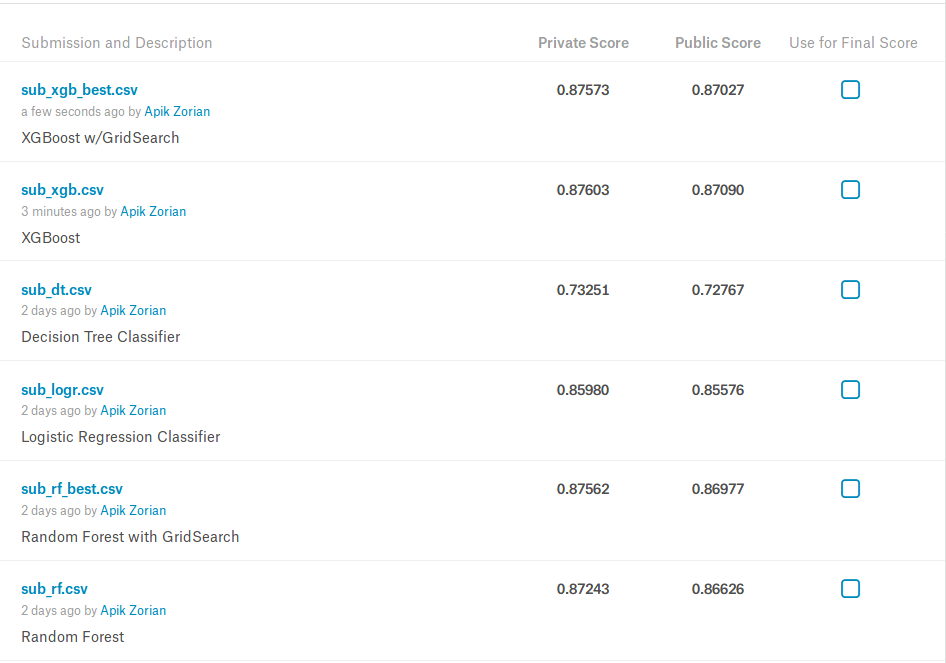

In [41]:
from IPython.display import Image
Image("./kaggle_scores.png")


As we had predicted, the ensemble learners performed better than the basic supervised learners. Surprisingly, the XGBoost with optimized parameters actually performed worse than without optimized parameters on the public score, even though our local accuracy and nDCG scores showed that it performed better. This may have been because we had not provided it with the default value for the learning rate as one of the options for the parameters. Regardless, the difference between the two is minimal, as is the difference between the Random Forest classifier and the Random Forest classifier with optimized parameters. We will elaborate more on this later.

### Runtime

In [34]:
runtime = pd.read_pickle('runtime1.pickle')

In [24]:
values = {}

for i in runtime:
    value_new = {}
    value_new['Runtime(s)'] = runtime[i][0]
    values[i] = value_new

pd.DataFrame(values).T

,Runtime(s)
dt,4.371682
dt_pred,0.042343
dt_prob,0.033437
logr,131.991236
logr_pred,0.028207
logr_prob,0.030732
rf,12.131510
rf_gd,341.557885
rf_gd_pred,0.449730
rf_gd_prob,0.321422


The table above shows the time it took to fit each model, as well as the time it took to make each prediction modelname_pred) and to get the accuracies (modelname_prob). Decision Trees and Random Forest were both fit very quickly, both in under 13 seconds. The logistic regression model took 2 minutes, while XGBoost took more than half an hour. The models that used XGBoost GridSearch took much longer to train, with Random Forest taking 5 minutes and XGBoost taking more than 4.5 hours! 

### Accuracy

In [32]:
accuracy_ndcg = pd.read_pickle('accuracy1.pickle')
accuracy_ndcg


{('dt', 'Accuracy'): 0.4918132627485887,
 ('dt', 'nDCG'): 0.6796459075933173,
 ('logr', 'Accuracy'): 0.5763509873275398,
 ('logr', 'nDCG'): 0.80347970702312,
 ('rf', 'Accuracy'): 0.5981822866646366,
 ('rf', 'nDCG'): 0.8009636474889729,
 ('rf_gd', 'Accuracy'): 0.6201072825654119,
 ('rf_gd', 'nDCG'): 0.8191571923551193,
 ('xgb', 'Accuracy'): 0.6262444074863555,
 ('xgb', 'nDCG'): 0.8221821740492198,
 ('xgb_gd', 'Accuracy'): 0.62734534211,
 ('xgb_gd', 'nDCG'): 0.82236365083}

In [35]:
final_dict = {}

desc = {'dt': 'Decision Tree', 'logr': 'Logistic Regression',
        'rf': 'Random Forest', 'rf_gd': 'Random Forest - Best Estimator',
        'xgb': 'XGBoost', 'xgb_gd': 'XGBoost - Best Estimator'}
kag = {'dt': 0.72767, 'logr': 0.85576, 'rf': 0.86626, 'rf_gd': 0.86977, 'xgb': .87090, 'xgb_gd': .87027}
processed = []
for d, k in accuracy_ndcg.items():
    clf_name = d[0]
    if clf_name in processed:
        continue
    value = {}
    if d[1] == 'nDCG':
        score = 'Accuracy'
    else:
        score = 'nDCG'
    clf_name = d[0]
    d1 = accuracy_ndcg[(clf_name, d[1])]
    d2 = accuracy_ndcg[(clf_name, score)]
    k_val = kag[clf_name]
    value[d[1]] = d1
    value[score] = d2
    value['kaggle_nDCG'] = kag[clf_name]
    value['Runtime(s)'] = runtime[clf_name][0]
    final_dict[desc[clf_name]] = value
    processed.append(clf_name)
pd.DataFrame(final_dict).T

,Accuracy,Runtime(s),kaggle_nDCG,nDCG
Decision Tree,0.491813,4.371682,0.72767,0.679646
Logistic Regression,0.576351,131.991236,0.85576,0.803480
Random Forest,0.598182,12.131510,0.86626,0.800964
Random Forest - Best Estimator,0.620107,341.557885,0.86977,0.819157
XGBoost,0.626244,2189.293725,0.87090,0.822182
XGBoost - Best Estimator,0.627345,16800.558455,0.87027,0.822364


We can see the accuracies and nDCG are higher for the ensemble learners than the regular supervised learners. Seeing these results, one might think that using GridSearchCV to optimize the results might not be worth the trouble for our ensemble learners. The improvement in accuracy and nDCG is minimal, but the runtime difference is highly signifficant (28x for Random Forest, 76x for XGBoost). Truthfully this decision relies on the user and the use case. In the case where the testcase involves medical data and people's lives, every fraction of a percentage counts. However, in the case where we are looking to advertise for a user to book a trip somewhere, the extra runtime for such a small improvement is not necessary.

# Conclusion

In [2]:
rf_best = pd.read_pickle('rf_best_model.sav')
rf_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
fig_std=(10,8)
y_pred = rf_best.predict_proba(X_1)
train_users_path = 'data/train_users_2.csv'
train_users = pd.read_csv(train_users_path)
target = train_users['country_destination']
le = LabelEncoder()
le.fit_transform(target.values)

In [10]:
cts = []
for i in range(len(X_1)):
    cts += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:1].tolist()
ps = pd.Series(cts)    

[Text(0,0.5,u'frequency'), Text(0.5,0,u'countries')]

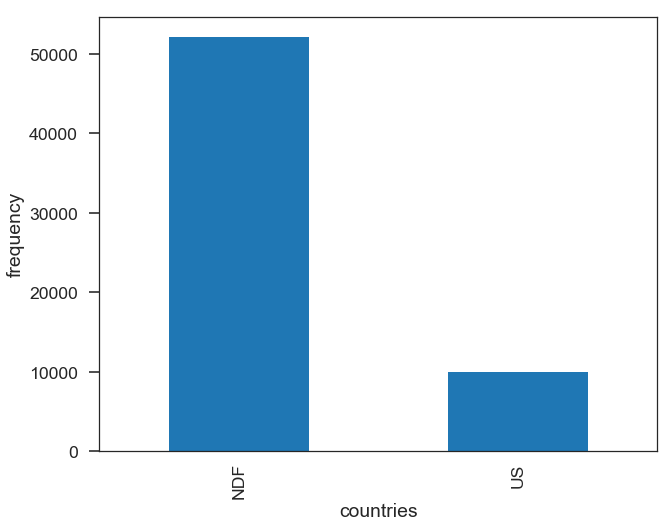

In [18]:
ps.value_counts().plot(kind='bar', figsize=fig_std).set(xlabel='countries', ylabel='frequency')

Looking at the predictions from our Random Forest classifier, we can see that the majority of the first time users do not choose a destination on their first time using Airbnb, while the rest end up booking in the U.S. One way that Airbnb could help change this is to make suggestions on the first time the user logs on to Airbnb, to help them make a decision on where to first book their trip.

In [ ]:
rf_gridsearch = pd.read_pickle('rf_gridsearch_new.sav')

In [7]:
print(rf_gridsearch.best_params_)
print(rf_gridsearch.best_score_)

{'min_samples_split': 20, 'max_depth': 20}
0.819325956855


In [38]:
xgb_gd_2 = pd.read_pickle('xgb_gridsearch2.sav')

In [39]:
print(xgb_gd_2.best_params_)
print(xgb_gd_2.best_score_)

{'learning_rate': 0.12, 'max_depth': 7}
0.822248230747


In both cases where we used `GridSearchCV`, our accuracy and nDCG values went up for the respective classifiers. When we look at the best parameters, we see that GridSearch chose the highest max depth for both our Random Forest and our XGBoost classifiers from the choices we had provided. This means that of all of the simulations, the model with the maximum number of trees from the parameters provided was needed to provide the best score. In other words, we needed the highest level of complexety in terms of depth of model to get the best score. This may be because of the number of features we are working with is on the larger side, so we need a more complex model to give us better results. GridSearch also chose the lowest learning rate (0.12) from the values provided. This means that the model is a better learner when it takes smaller steps to learn. Again, given our large number of features, the model may miss something when it takes large steps during gradient descent and when it takes smaller steps, it is able to fit more closely to the data.

In [12]:
import pandas as pd
from IPython.display import display

rf_feature_importances = pd.DataFrame(rf_best.feature_importances_,
                                   index = X_1.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
display(rf_feature_importances.head())

,importance
age,0.249205
booking_request_pct,0.033696
booking_request_sum,0.029715
dac_wn,0.026009
tstamp_week,0.025624


In [14]:
xgb_feature_importances = pd.DataFrame(xgb_best.feature_importances_,
                                   index = X_1.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
display(xgb_feature_importances.head())

,importance
age,0.082176
tstamp_hour,0.075424
account_year,0.066826
dac_wn,0.066771
data_pct,0.028663


In both cases, age seems to be the highest level of importance when looking at our features to determine where a user will first book his or her first trip. This makes sense, as certain destinations are more catered to a young crowd who might be looking for a livelier nightlife and more outdoor adventures, while an older user may be looking at destinations with more relaxing environments or family friendly activities. We seen that the week # of the year (dac_wn) that an account is created is also in the top 5 features. This would also make sense, considering the time a user creates his/her account could be because they are looking to take a trip to go somewhere with better weather conditions than they are currently in. For example, a user who lives in New York may get fed up with the cold weather in December and want to book a trip to South America. Also, U.S. users tend to have longer vacation time during Christmas time and during the summer time between June-August. As Europe is a close and popular destination for U.S. citizens, a user who makes his/her account in May, for example, might be doing so with the intentions of finding lodging for his/her Europe trip that is coming up in the next month or two

## Reflection and Improvements

Although we have grown through the use of the classic supervised learning models, we are seeing more and more the benefits of using ensemble learning algorithms to provide better prediction results for data analysis. With this project, we demonstrated that ensemble learning classifiers such as Random Forest and XGBoost are able to provide better results than simply using weak learners. Using a model such as a decision tree or SVM can still provide good results, however leveraging these supervised learners to build stronger ensemble learners helps use their strengths without suffering from the setbacks of overfitting or inefficiency on larger datasets.

In the future, we could extend our work to potentially utilize the rest of the available data, such as the age and countries data sets, to possibly encorporate more user data. Additionally, we might consider using different boosting algorithms, such as Adaboost, or neural networks to see if we can create even better results.

The biggest takeaway from this project was learning the power of Gridsearch. We were able to see significant imporvements in our Random Forest and XGBoost models after using Gridsearch to optimize our learning parameters. Although runtime ends up being longer, it is still better in the long run to come away with the best parameters, rather than tuning all parameters one at a time on your own until you find the best result.

Finally, our final results, as well as the final results of future participants, would be greatly improved with some preliminary improvements to the available data. The sessions training data, for example, was missing almost half of the users information. Furthermore, the data could be improved by adding a specific state for the users who live in the United States. It is understandable that in Airbnb's initial years, most users were in the U.S., yet this skewed the data so heavily to "user lives in the U.S." that it was difficult to use any more information on their location. For example, there are some cities that have large populations of immigrants from different areas in the world. If we had these cities available to us in the data, we would be able to make better predictions on whether or not the user may be planning a trip back home to see their family and where that may be.

Overall, this project was a great lesson in both data manipulation and the benefits of different Machine Learning algorithms. We visualized our data, identified key features that stood out, cleaned out others that were not relevant, and trained and refined models to give us our best chance at predicting future users' first bookings. 